In [1]:
#라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trash = pd.read_excel('/content/trash.xlsx')
trash.head()

,자치구별(1),시점,"주민 1인당 생활폐기물(쓰레기) 배출량 (㎏/인, 일)",생활폐기물 배출량 (톤/일),주민수 (명)
0,계,2012,0.88,9189.3,10442426
1,NaN,2013,0.82,8559.0,10388055
2,NaN,2014,0.93,9613.8,10369593
3,NaN,2015,0.92,9438.7,10297138
4,NaN,2016,0.94,9608.0,10204057


# 전처리

In [3]:
trash = trash.drop(trash.index[:11])
trash

,자치구별(1),시점,"주민 1인당 생활폐기물(쓰레기) 배출량 (㎏/인, 일)",생활폐기물 배출량 (톤/일),주민수 (명)
11,종로구,2012,2.23,386.6,173148
12,NaN,2013,2.11,354.7,167867
13,NaN,2014,2.21,365.4,165344
14,NaN,2015,1.98,324.4,163822
15,NaN,2016,2.51,406.0,161922
...,...,...,...,...,...
281,NaN,2018,0.86,370.1,431920
282,NaN,2019,0.95,419.9,440390
283,NaN,2020,0.79,368.0,463998
284,NaN,2021,0.86,401.7,466472


In [4]:
# 자치구별(1) 구이름 채워넣기
trash['자치구별(1)'] = trash['자치구별(1)'].fillna(method='ffill')
trash.head()

<ipython-input-4-1928de877d29>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trash['자치구별(1)'] = trash['자치구별(1)'].fillna(method='ffill')


,자치구별(1),시점,"주민 1인당 생활폐기물(쓰레기) 배출량 (㎏/인, 일)",생활폐기물 배출량 (톤/일),주민수 (명)
11,종로구,2012,2.23,386.6,173148
12,종로구,2013,2.11,354.7,167867
13,종로구,2014,2.21,365.4,165344
14,종로구,2015,1.98,324.4,163822
15,종로구,2016,2.51,406.0,161922


In [5]:
#칼럼 이름 간단하게
trash.columns = ['자치구별' , '년도', '1인당 배출량', '쓰레기량', '주민수']
trash.head()

,자치구별,년도,1인당 배출량,쓰레기량,주민수
11,종로구,2012,2.23,386.6,173148
12,종로구,2013,2.11,354.7,167867
13,종로구,2014,2.21,365.4,165344
14,종로구,2015,1.98,324.4,163822
15,종로구,2016,2.51,406.0,161922


#기본 데이터 검사 진행

In [6]:
#데이터 사이즈
trash.shape

(275, 5)

In [7]:
#자치구별은 인코딩 해야됨 !
trash.dtypes

,0
자치구별,object
년도,int64
1인당 배출량,float64
쓰레기량,float64
주민수,int64


In [8]:
#기본 통계량
trash.describe()

,년도,1인당 배출량,쓰레기량,주민수
count,275.000000,275.000000,275.000000,275.000000
mean,2017.000000,1.050109,386.932727,404368.080000
std,3.168043,0.595967,178.578501,126961.660889
min,2012.000000,0.450000,180.200000,130785.000000
25%,2014.000000,0.750000,288.100000,323619.000000
50%,2017.000000,0.870000,345.500000,408493.000000
75%,2020.000000,1.110000,423.900000,486506.500000
max,2022.000000,3.930000,2059.700000,682741.000000


In [9]:
# 널값 체크
trash.isna().sum()

,0
자치구별,0
년도,0
1인당 배출량,0
쓰레기량,0
주민수,0


#한글처리

In [10]:
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [11]:
#런타임 재시작후 폰트 설정
plt.rc('font', family='NanumBarunGothic')

## 탐색적 분석

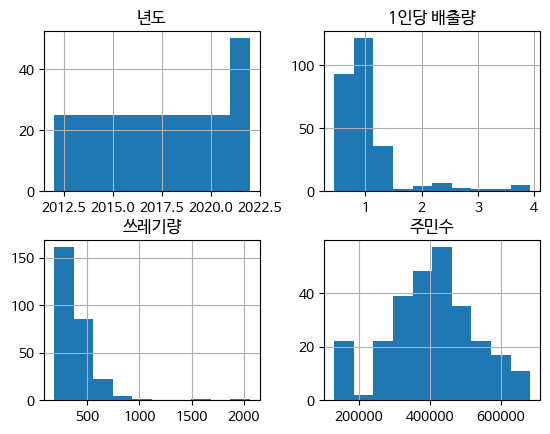

In [12]:
#일변량 분석(히스토그램)
#일변량 분석(박스플랏)
#년도에서 데이터 2022년 다시 보기
trash.hist()
plt.show()

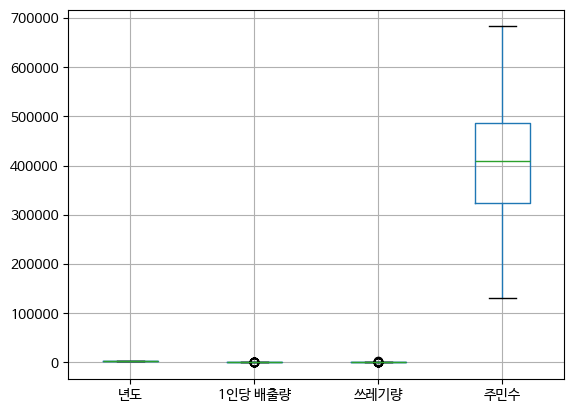

In [13]:
#일변량 분석(박스 플랏) > 스케일링 필요
trash.boxplot()
plt.show()

In [14]:
#다변량 분석(상관관계 분석)
trash.iloc[:,1:].corr()

,년도,1인당 배출량,쓰레기량,주민수
년도,1.000000,0.078287,0.120501,-0.077890
1인당 배출량,0.078287,1.000000,0.438566,-0.500082
쓰레기량,0.120501,0.438566,1.000000,0.420249
주민수,-0.077890,-0.500082,0.420249,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


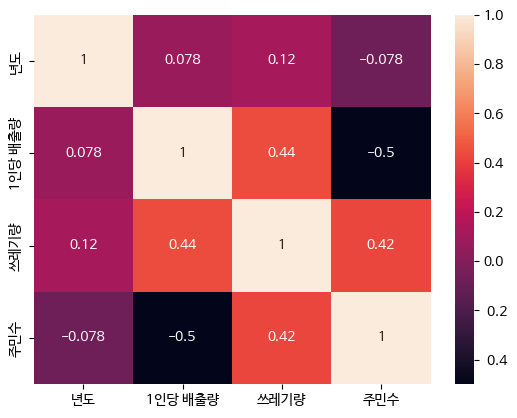

In [16]:
# 다변량 분석 (상관관계 분석)
sns.heatmap(trash.iloc[:,1:].corr(), annot=True)
plt.show()

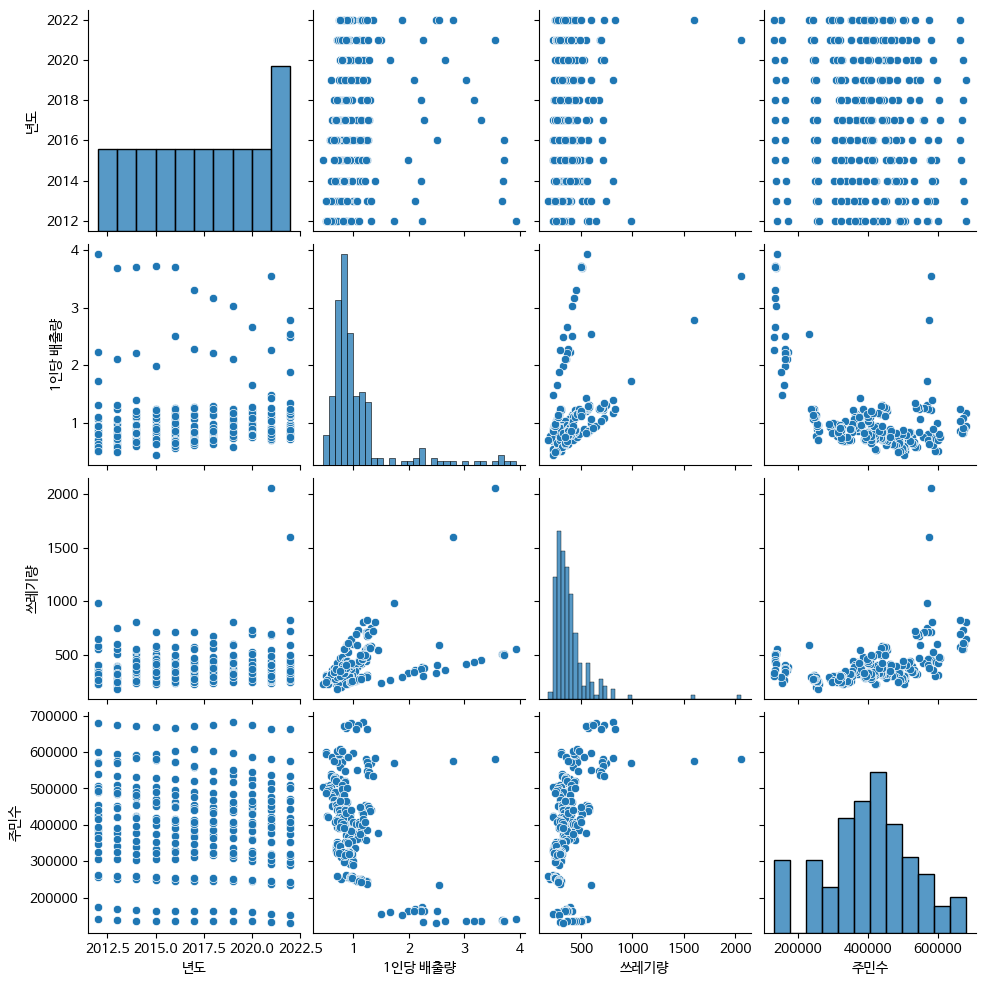

In [17]:
sns.pairplot(trash.iloc[:,1:])
plt.show()

# 인코딩

In [19]:
# 자치구를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
trash['자치구별'] = encoder.fit_transform(trash['자치구별'])
trash.head()

,자치구별,년도,1인당 배출량,쓰레기량,주민수
11,22,2012,2.23,386.6,173148
12,22,2013,2.11,354.7,167867
13,22,2014,2.21,365.4,165344
14,22,2015,1.98,324.4,163822
15,22,2016,2.51,406.0,161922


## 모델링

In [51]:
#x와 y split
y = trash.쓰레기량
x = trash.drop('쓰레기량', axis=1)

In [52]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# 회귀분석
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
#평가
model.score(x_test, y_test)

0.6929185315088899

In [55]:
# 잔차분석
y_pred = model.predict(x_test)
residual = y_test - y_pred

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


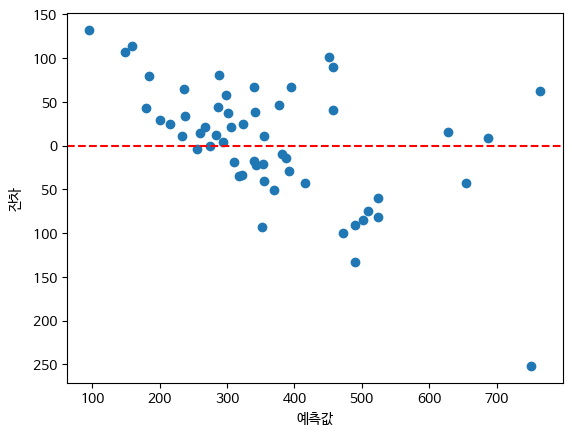

In [56]:
# 잔차그래프
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()

In [63]:
test_data = pd.DataFrame(
    {'자치구별': 0,
     '년도':2023,
     '1인당 배출량':1,
     '주민수': 2000000,
    },
    index=[0]
)

In [64]:
model.predict(test_data)

array([2357.9362198])